# Business Bank D&A
# Data Science Workshop 2: Fitting a Model

<img src = "https://miro.medium.com/max/1400/1*RiEfzta7FkYiRq44jhSb7g.png" width = "650" >


## California Housing Data Example:

Can we prededict the median value of houses in each suburb based on various features?

#### ML Model Development Cycle:

1. Data Preparation.
2. Model Training.
3. Model Assesment. 
4. Model Interpretation
5. Model Tuning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [428]:
housing = pd.read_csv(r'C:\Users\CP352846\OneDrive - Capitec Bank Ltd\Data Science\DS Workshops\Workshop 1\california_housing.csv', usecols = ['longitude', 'latitude','total_rooms', 'median_income','ocean_proximity', 'median_house_value'])


In [383]:
housing.sample(10, random_state = 1)

,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value
8299,-118.14,33.77,2208.0,5.8408,249316.765348,500000
10034,-121.08,39.21,3033.0,2.4811,124805.392001,111800
14960,-116.92,32.76,1859.0,5.9202,240078.654697,181300
85,-122.28,37.81,773.0,2.4083,259362.480979,98200
18437,-121.87,37.25,2498.0,3.7844,240078.654697,183900
11262,-117.99,33.79,2470.0,3.1801,240078.654697,190500
11214,-117.91,33.82,1408.0,3.7014,240078.654697,179600
10595,-117.79,33.68,1998.0,6.8722,240078.654697,326100
9886,-122.29,38.30,144.0,1.0096,259362.480979,162500
3357,-120.65,40.42,3240.0,2.1875,124805.392001,64300


### Types of Machine Learning:
<img src = "https://cdn-images-1.medium.com/max/800/1*rbaxTrB_CZCqbty_zv2bEg.png" width = "650" >


### Model Selection

<img src = "http://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet.png" width = "650" >



#### Key Takeaways:

1. **There are no strong linear relationships between features and response varible.**
2. **Many variables displayed skewed or bimodal distributions.**
3. Rare values are present in the dataset.
4. There are outliers present in the Dataset

#### Decision Trees:

The Decision Tree is a type of machine learning algorithm which is able to learn rules from a dataset in order to infer the result of the target variable.

<img src = "https://bookdown.org/tpinto_home/Beyond-Additivity/tree.png" width = "650" >


In [389]:
#import ML Libraries

from sklearn.tree import DecisionTreeRegressor, plot_tree  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder



#### 1. Data Preparation
    1. Remove Blank Records.
    2. All Categorical Variables need to be encoded as numerical variables.
   

In [429]:
housing = housing.dropna()


# One hot encoding
ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(housing.ocean_proximity.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd)
df_ohe.columns = ohe.get_feature_names_out()

# Add encoded feature to the dataframe
housing_for_model = pd.concat([housing, df_ohe], axis=1)
housing_for_model.sample(10)


,longitude,latitude,total_rooms,median_income,ocean_proximity,median_house_value,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
17519,-121.91,37.33,454.0,2.9853,<1H OCEAN,187500.0,1.0,0.0,0.0,0.0,0.0
2139,-119.74,36.77,2427.0,2.5737,INLAND,76900.0,0.0,1.0,0.0,0.0,0.0
4312,-118.33,34.09,654.0,3.6953,<1H OCEAN,200000.0,1.0,0.0,0.0,0.0,0.0
5175,-118.27,33.95,1261.0,2.2946,<1H OCEAN,88800.0,1.0,0.0,0.0,0.0,0.0
13369,-117.57,34.13,6135.0,5.9369,INLAND,225200.0,0.0,1.0,0.0,0.0,0.0
15597,-116.45,32.65,2680.0,2.1949,INLAND,127100.0,1.0,0.0,0.0,0.0,0.0
9400,-122.56,37.91,1972.0,7.1924,NEAR BAY,500001.0,0.0,0.0,0.0,1.0,0.0
10991,-117.81,33.73,4022.0,3.0305,<1H OCEAN,140600.0,1.0,0.0,0.0,0.0,0.0
11421,-117.98,33.70,3451.0,6.3749,<1H OCEAN,278000.0,1.0,0.0,0.0,0.0,0.0
15300,-117.36,33.18,5550.0,2.5509,NEAR OCEAN,181800.0,0.0,0.0,0.0,0.0,1.0


#### 2. Model Training:

In [384]:
#split data into train and test set:
housing_for_model = housing_for_model.dropna()
y = (housing_for_model.iloc[:,5:6])
x = (housing_for_model[['longitude', 'latitude', 'total_rooms', 'median_income', 'x0_NEAR BAY','x0_<1H OCEAN','x0_INLAND','x0_NEAR OCEAN','x0_ISLAND']])


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)




In [385]:
regressor = DecisionTreeRegressor(random_state=0) 
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

#### 3. Model Assesment

In [431]:
y_pred = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rsq_score = r2_score(y_test, y_pred)

# Print the test score
print('MSE Score: {:2.0}'.format(mse))
print("R Squared Score = {:2.2%}".format(test_score)) 

MSE Score: 5e+09
R Squared Score = 67.22%


#### 4. Model Interpretation

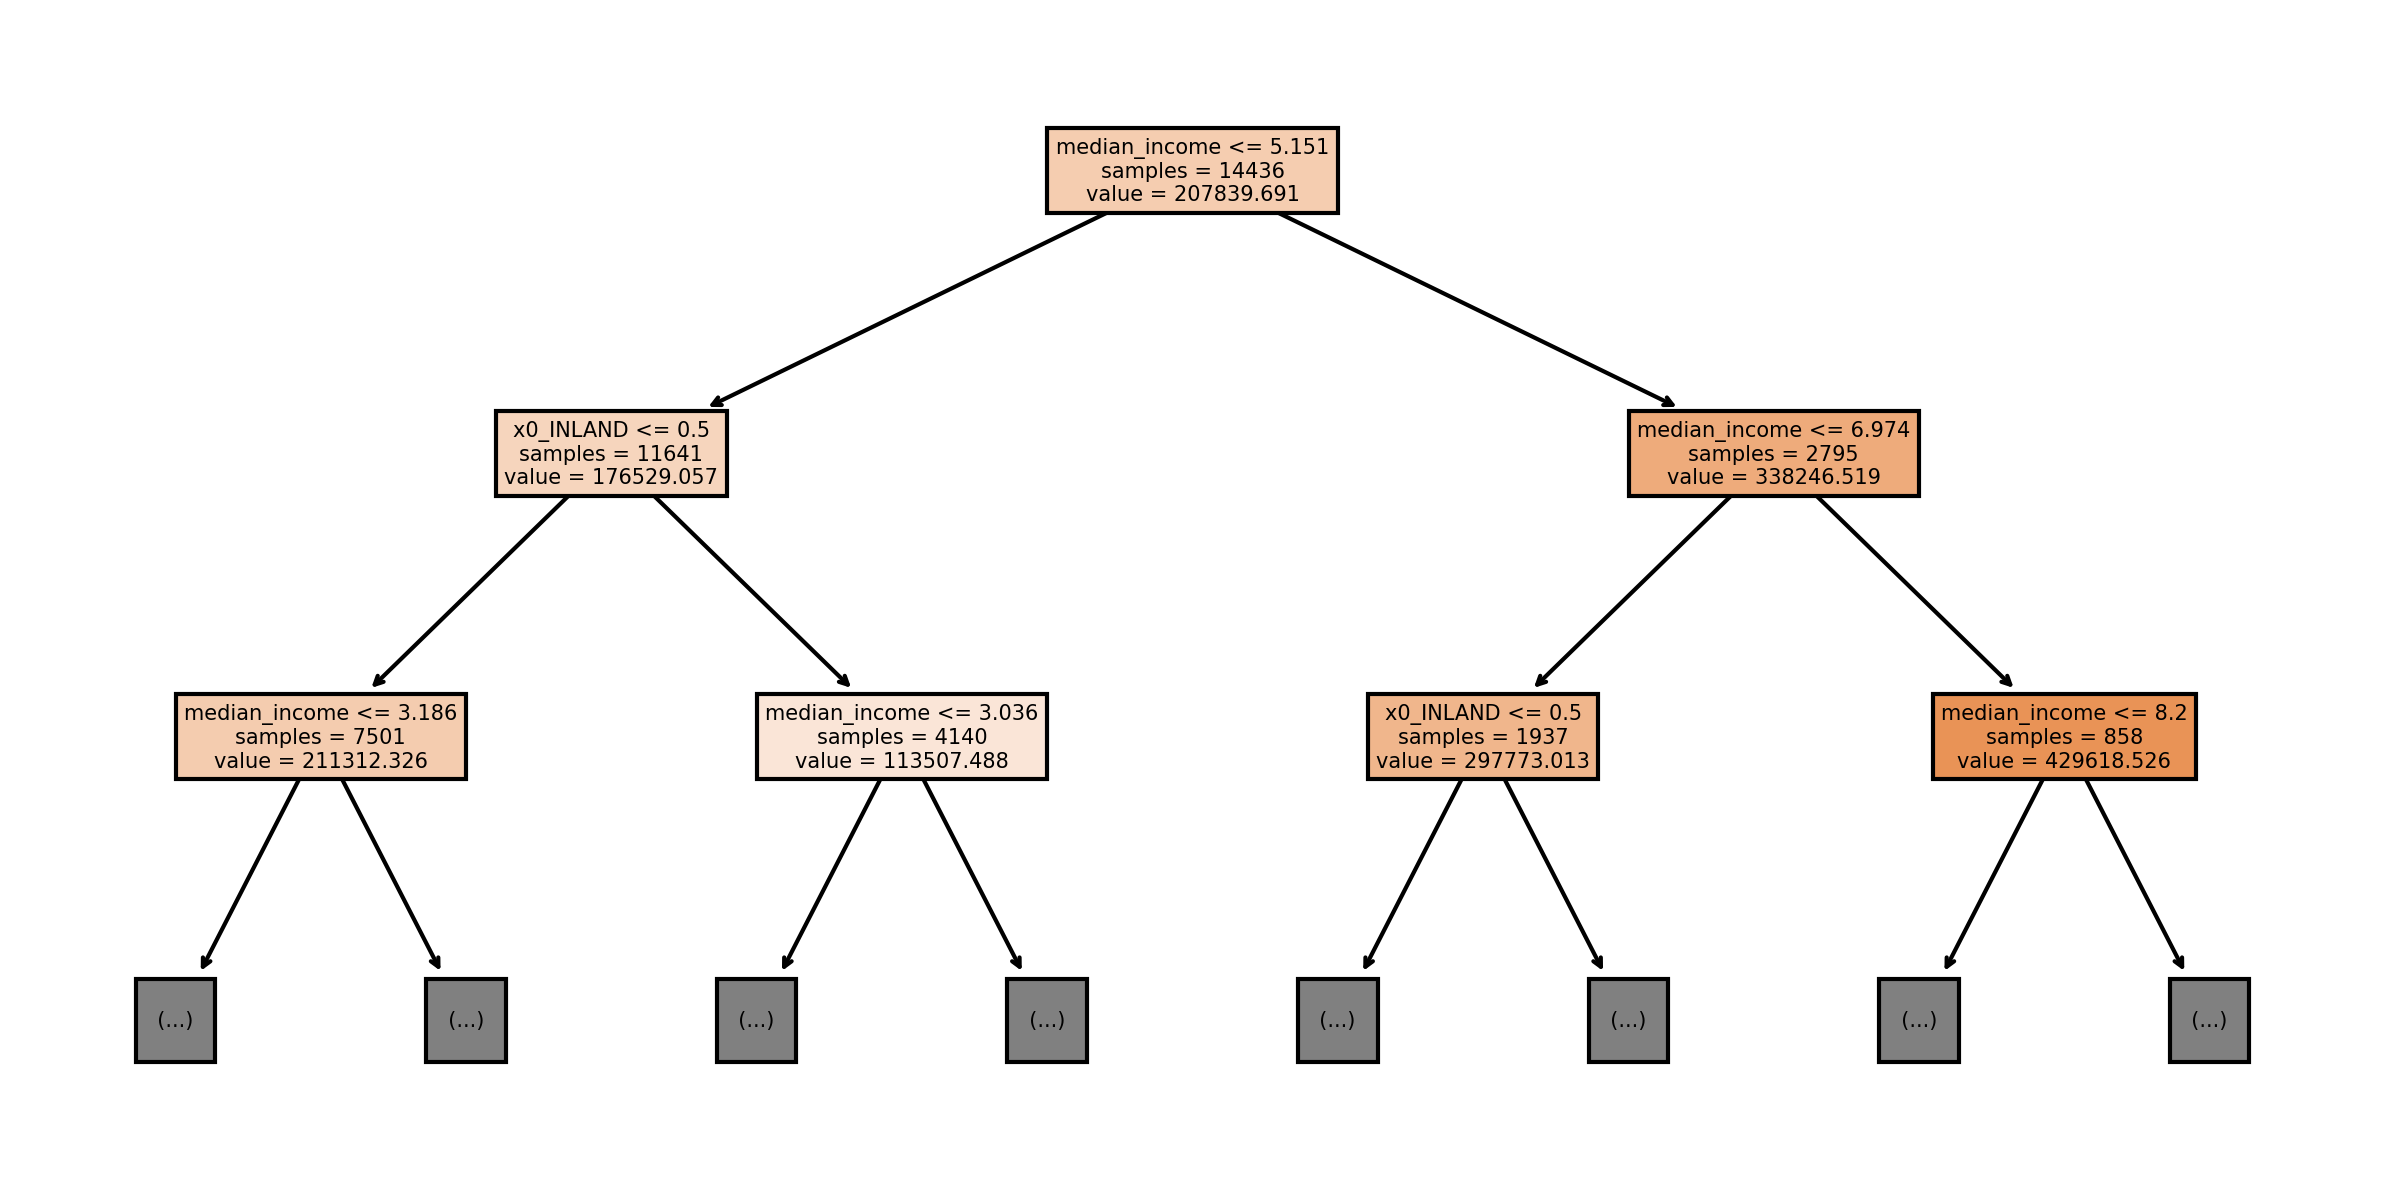

In [417]:
plt.figure(figsize=[10,5], dpi=300)
plot_tree(regressor, max_depth=2, 
          feature_names=x_train.columns,
          impurity=False,
          filled=True)
plt.show()

#### 5. Model Tuning

By optmizing the hyperparameters of the Decision Tree Model, we can prevent the model from over-fitting and imorove the quality of the predictions. 

In [420]:
# In order to find the optimal minimum leaf samples, cross validation is applied
validation_scores = []
for i in range(1,30):
    regressor2 = DecisionTreeRegressor(random_state=1, min_samples_leaf=i)
    score = cross_val_score(estimator=regressor2, X=x_train, y=y_train, cv=5)   
    validation_scores.append(score.mean())

In [421]:
# Fit Model with Optimized parameters
samples_optimum = samples[validation_scores.index(max(validation_scores))]
regressor2 = DecisionTreeRegressor(random_state=0, min_samples_leaf=samples_optimum)
regressor2.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_leaf=13, random_state=0)

In [426]:
y_pred = regressor2.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred)
test_score2 = r2_score(y_test, y_pred)
print('MSE Score: {:2.2}'.format(mse2))
print("R Squared score of the optimal tree = {:2.2%}".format(test_score2))

MSE Score: 3.1e+09
R Squared score of the optimal tree = 76.05%


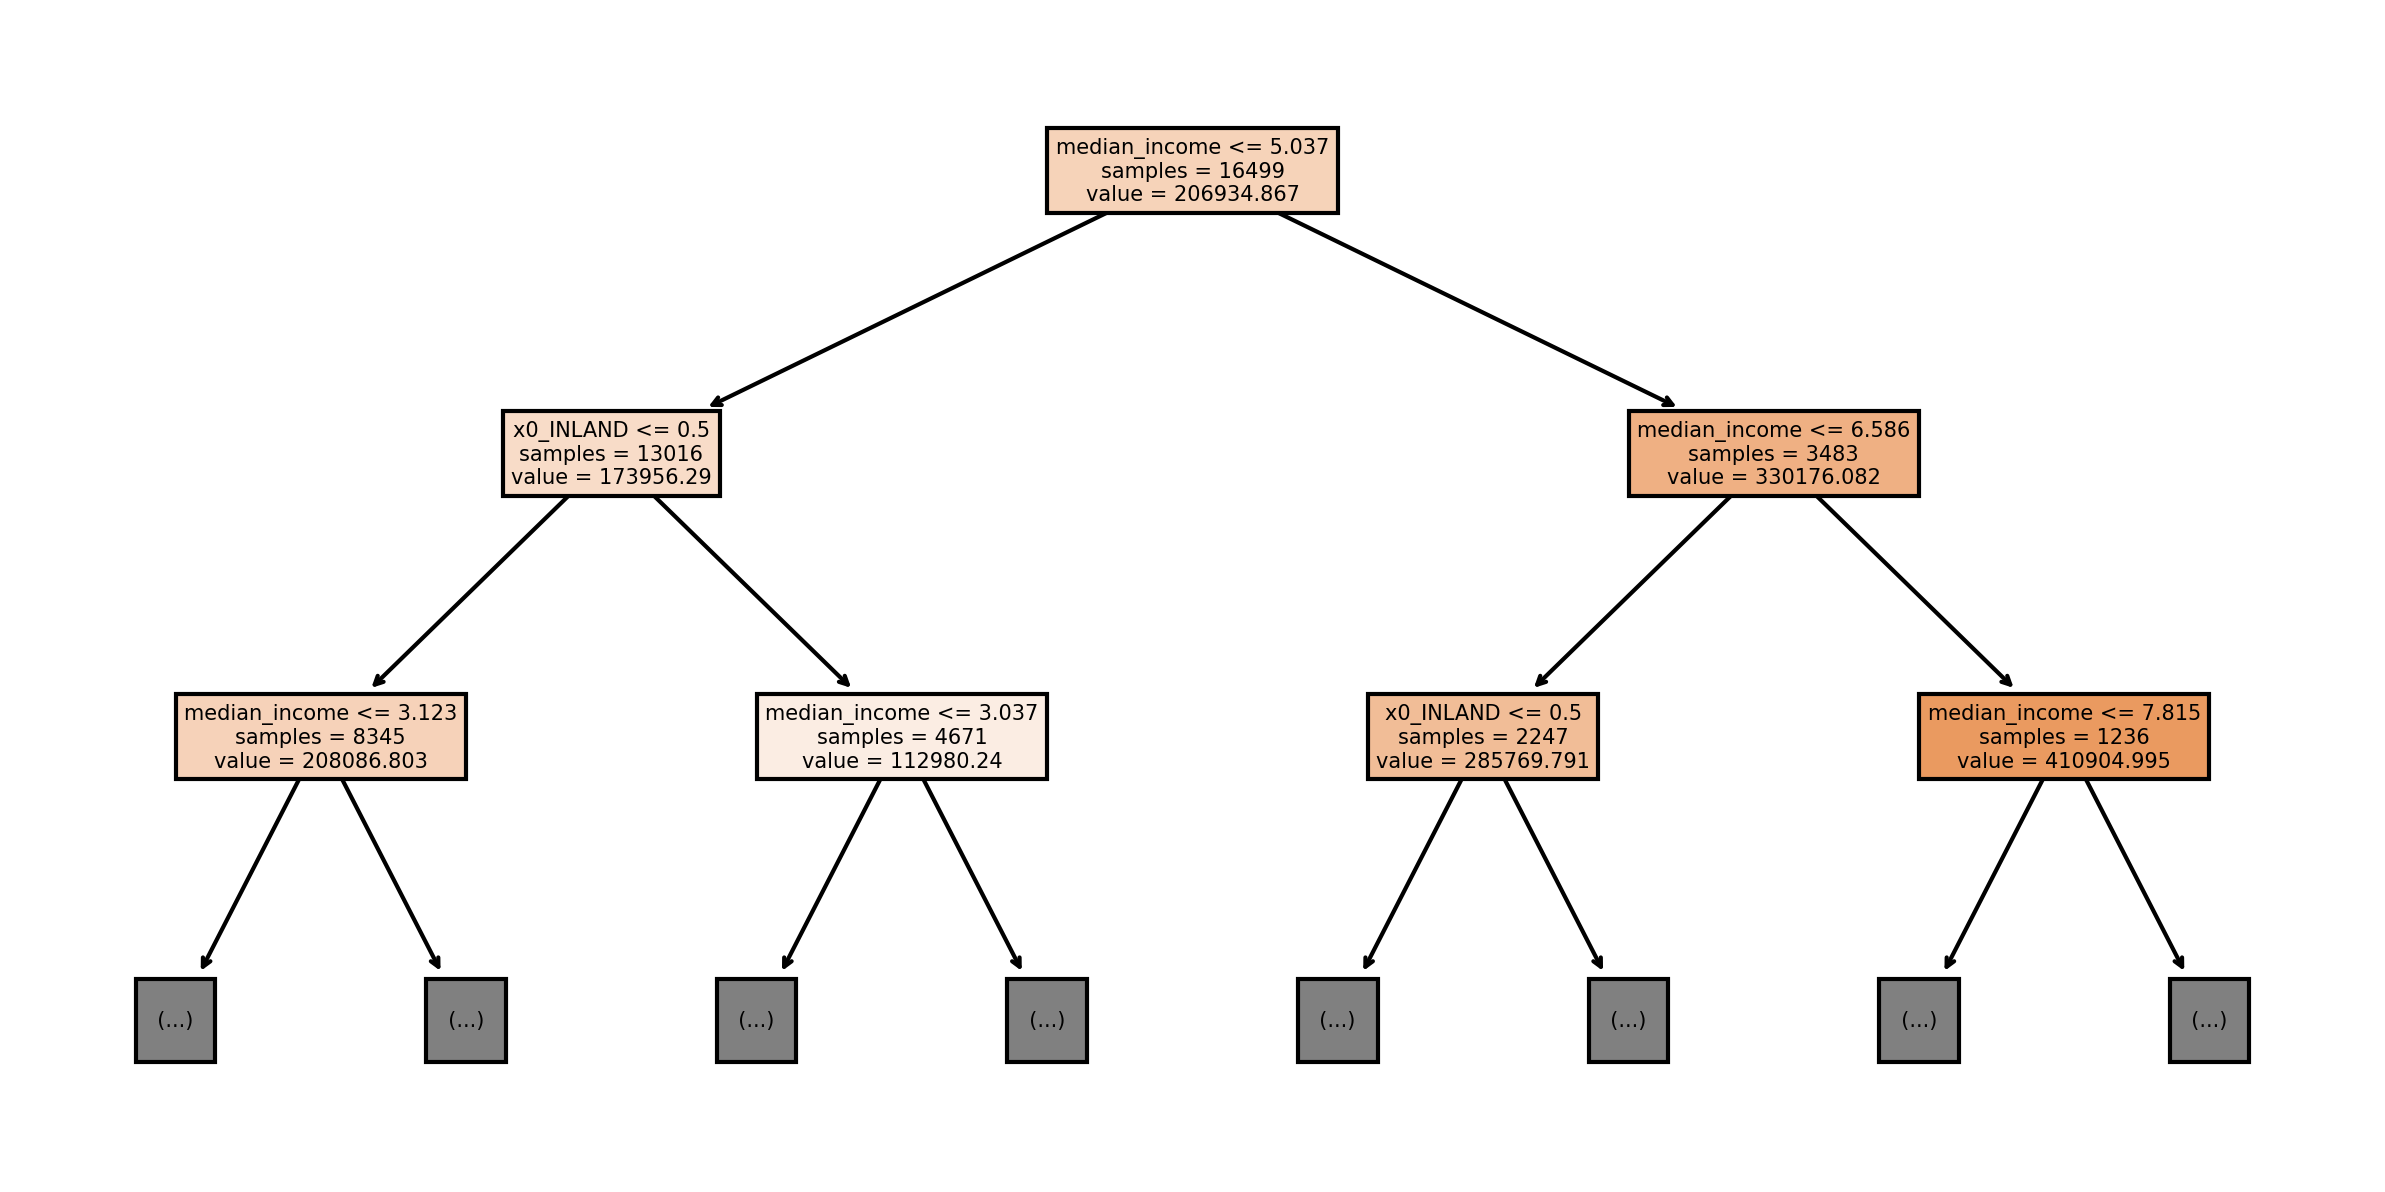

In [249]:
plt.figure(figsize=[10,5], dpi=300)
plot_tree(classifier4, max_depth=2, 
          feature_names=x_train.columns,
          impurity=False,
          filled=True)
plt.show()